[17, 2, 7, 13, 5, 12, 3, 16, 18, 6, 14, 15, 4, 1, 20, 11, 9, 10, 8, 0, 19]
['Turkish exclude both', 'Turkish exclude human', 'Turkish exclude references', 'Turkish unconstrained', 'Marathi unconstrained', 'Marathi exclude references', 'Marathi exclude both', 'Marathi exclude human', 'Greek original', 'English unconstrained', 'English exclude references', 'English exclude human', 'English exclude both', 'Finnish exclude both', 'Finnish exclude human', 'Finnish exclude references', 'Finnish unconstrained', 'Swedish unconstrained', 'Swedish exclude references', 'Swedish exclude human', 'Swedish exclude both']
8


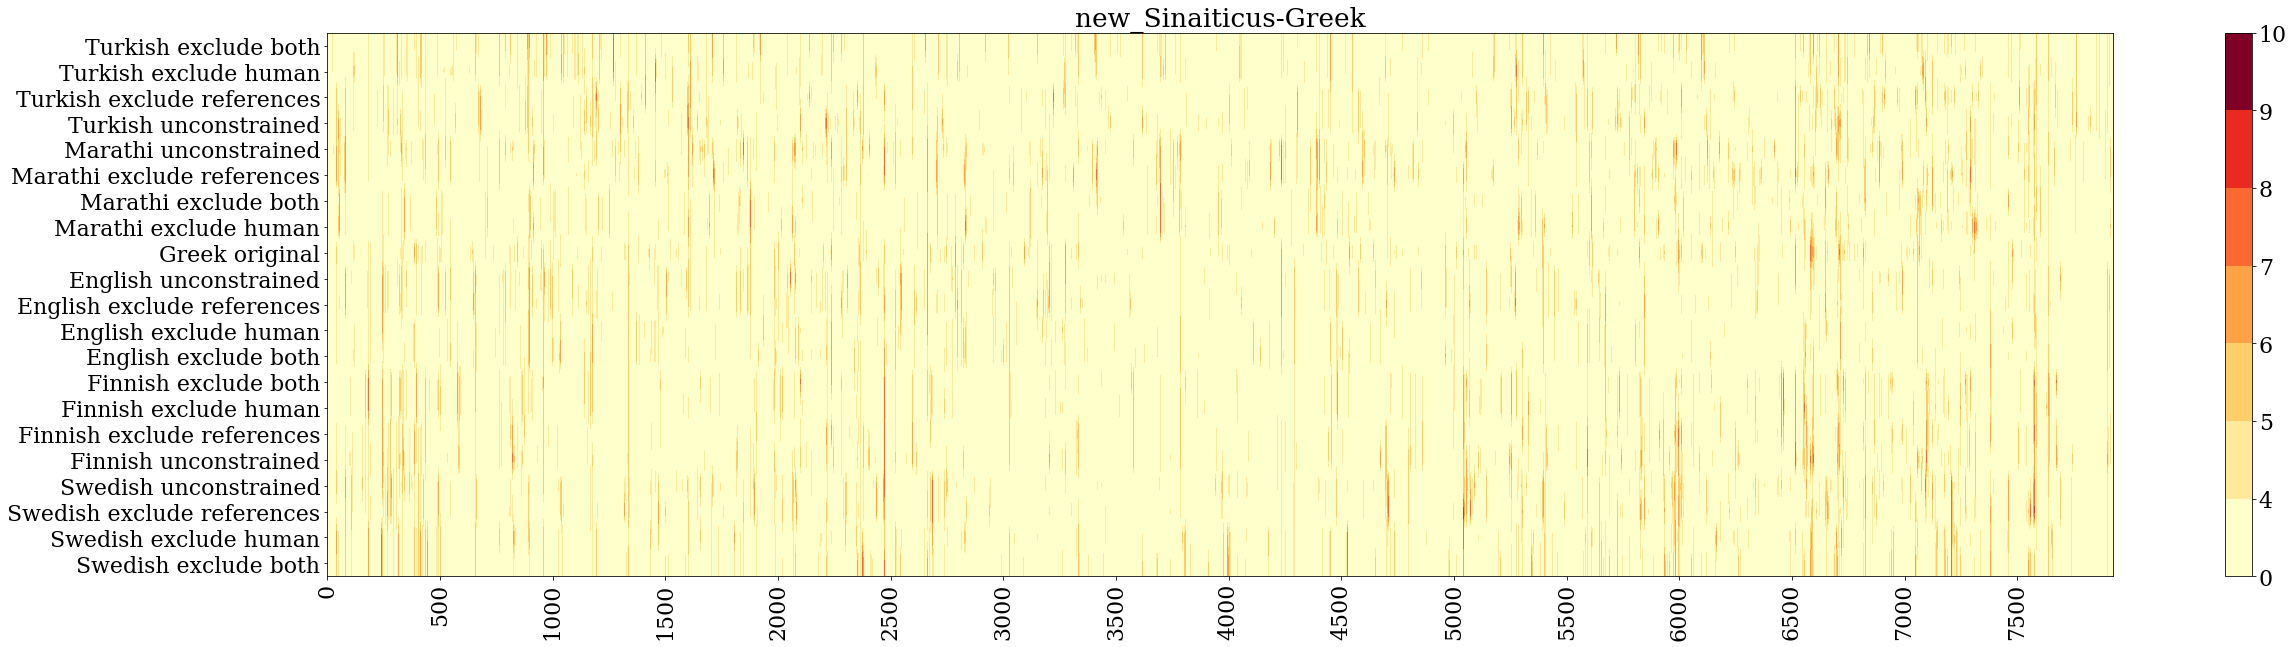

In [100]:
# taking in an array of vectors, we perform hierarchical clustering

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, optimal_leaf_ordering
from scipy.spatial.distance import pdist
import pickle
import sys
import os
import matplotlib as mpl
sys.path.append("../scripts")
from utils import Location, Bible


# manuscript='old_WLC-Hebrew'
manuscript='new_Sinaiticus-Greek'
# manuscript='old_Sinaiticus-Greek'
with open(f"../data/{manuscript}_data_with_scores_new_alg.pkl", "rb") as ifd:
            data = pickle.load(ifd)

# remove data from any file with Japanese in the title
data = {k:v for k,v in data.items() if 'Japanese' not in k}

# df_data =[]

# print(data.keys())
# print(data.items())
# for k, v in data.items():
#     basename = os.path.basename(k)
#     lang = basename.split("_")[-1].split("-chiasm")[0]
#     constraint = basename.split(manuscript)[1].split(lang)[0].replace("_", " ").strip().rstrip()
#     # print(k, lang, constraint)
#     for loc, length in list(zip(v['locations'], v['lengths'])):
#         df_data.append({"language": lang, "constraint": constraint, "location": loc, "length": length})

# import pandas as pd
# df = pd.DataFrame.from_records(df_data)
# print(df.head())

# df.to_pickle(f'{manuscript}.pkl')
# let's rework the array to send to Tom
# exit()
orig_idx = [i for i, (k,v) in enumerate(data.items()) if 'original' in k][0]
langs = [k.split("_")[-1].split("-chiasm")[0] for k in data.keys()]
# print(langs)
constraints = [k.split(manuscript)[1].split(langs[i])[0].replace("_", " ").strip().rstrip() for i, k in enumerate(data.keys())]
# print(constraints)
labels = [f"{lang} {constraint}" for lang, constraint in list(zip(langs, constraints))]
# print(labels)
# labels = [" ".join(d.split("_")[-3:]).split("-chiasm")[0] for d in data.keys()]
# print(labels[orig_idx])
# # print(orig_idx)
# # print([k for k in data.keys()])

array_of_vectors = np.asarray([v['lengths'] for _,v in data.items()])
array_of_locations = np.asarray([v['locations'] for _,v in data.items()])
idx2loc = {k:v for k,v in enumerate(array_of_locations[0])}

# Assume array_of_vectors is your input numpy array with shape (m, n)

# array_of_vectors = np.random.rand(10, 5)  # Example array

# Step 1: Compute the pairwise distance matrix
distance_matrix = pdist(array_of_vectors, metric='euclidean')

# Step 2: Perform hierarchical clustering
linked = linkage(distance_matrix, method='ward')

# Step 3: Extract the optimal leaf order
optimal_order = optimal_leaf_ordering(linked, distance_matrix)

# Get the order of the leaves
dendro = dendrogram(optimal_order, no_plot=True)
ordered_indices = dendro['leaves']
print(ordered_indices)

# Step 4: Reorder the array of vectors
ordered_array = array_of_vectors[ordered_indices]
ordered_labels = [labels[i] for i in ordered_indices]
print(ordered_labels)
# want to pull the 'original' line out of the array and put it first


# Step 5: Plot the reordered vectors using imshow
N = np.unique(ordered_array).shape[0]
mpl.rcParams.update({'font.size': 22})
print(N)
plt.figure(figsize=(40,10))
plt.imshow(ordered_array, aspect='auto', cmap=discrete_cmap(N, 'YlOrRd'), norm=mpl.colors.BoundaryNorm(np.unique(ordered_array), N))
# plt.imshow(ordered_array, aspect='auto', cmap='Set2')
plt.colorbar()
plt.title(f'{manuscript}')
# plt.xlabel('Location')
# plt.xticks(labels = [idx2loc[i]["book"] for i in range(len(ordered_array[0]))], ticks=range(len(ordered_array[0])), rotation=90)
plt.xticks(ticks=np.arange(0, len(ordered_array[0]), step=500), rotation=90)
plt.yticks(labels = ordered_labels, ticks=range(len(data.keys())))
plt.show()
# plt.savefig('new_Sinaiticus_Greek-hierarchical.pdf', bbox_inches="tight")


In [116]:
# Psalms go roughly 13_000 to 15_000
# xlabels = [('Exodus', 2000), ('Leviticus', 3550), ('Psalms', 14_000), ('Proverbs', 16_000), ('Job', 17_500), ('Isaiah', 19_500), ('Jeremiah', 20_750)]
# xlabels = [('Numbers', 3550), ("Isaiah", 6000), ('Jeremiah', 7500), ('Ezekiel', 8500), ('Psalms', 11_750), ('Ezra', 20_500) ]
xlabels = [('Matthew', 450), ('Mark', 1300), ('Luke', 2100), ('John', 3000), ('Galatians', 6000), ('2 Timothy', 6700), ('2 Peter', 7250), ('Revelation', 7550)]

In [115]:
# I think we want to make a dictionary of starting position to location
idx2loc[7550]



{'book': 'REV', 'chapter': 2, 'verse': 8}

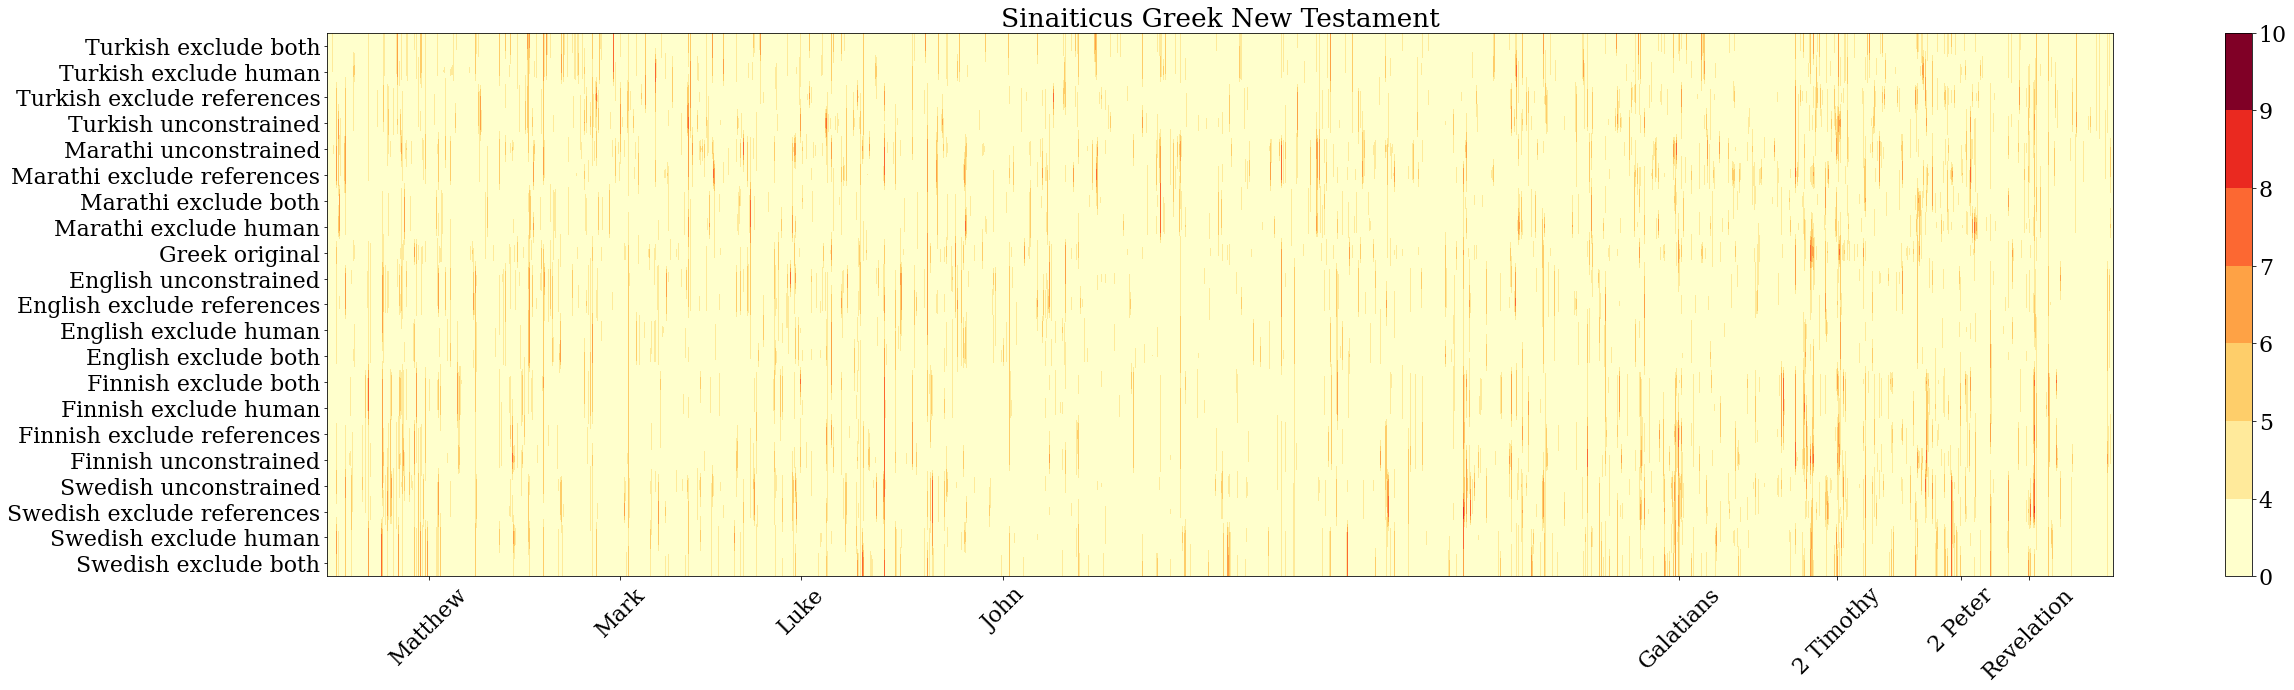

In [117]:
# Step 5: Plot the reordered vectors using imshow
N = np.unique(ordered_array).shape[0]
mpl.rcParams.update({'font.size': 22, 'font.family': 'serif'})

plt.figure(figsize=(40,10))
plt.imshow(ordered_array, aspect='auto', cmap=discrete_cmap(N, 'YlOrRd'), norm=mpl.colors.BoundaryNorm(np.unique(ordered_array), N))
# plt.imshow(ordered_array, aspect='auto', cmap='Set2')
plt.colorbar()
plt.title(f'Sinaiticus Greek New Testament')
# plt.xlabel('Location')
# plt.xticks(labels = [idx2loc[i]["book"] for i in range(len(ordered_array[0]))], ticks=range(len(ordered_array[0])), rotation=90)
plt.xticks(labels = [x[0] for x in xlabels], ticks = [x[1] for x in xlabels], rotation=45)
plt.yticks(labels = ordered_labels, ticks=range(len(data.keys())))
# plt.show()
plt.savefig(f"{manuscript}.pdf", bbox_inches="tight")

In [5]:
# we want to plot the heatmap, taking in this dataframe
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
def discrete_cmap(N, base_cmap=None):
    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


def plot_heatmap(df, ):
    plt.figure(figsize=(40,10))
    df = df.drop('corr', axis=1)
    # make int
    df = df.astype(int)
    # filter out the ones we don't want
    N = np.unique(df.values).shape[0]
    print(N)
    sns.heatmap(df, cmap=discrete_cmap(N, 'PuBu'), )
    # ylabels
    plt.yticks(rotation=0)
    # plt.xticks(rotation=90, ticks=range(df.shape[1]), labels=locations)
    # # # plt.savefig(f'{name}_heatmap.png')
    # plt.show()
    # plt.show()

In [6]:
# once we have the ordered array, we can use our plotting code
data.keys()

dict_keys(['../chiasm_score_new_alg/work_old_WLC-Hebrew_unconstrained_Turkish-chiasm.json.gz', '../chiasm_score_new_alg/work_old_WLC-Hebrew_exclude_both_Turkish-chiasm.json.gz', '../chiasm_score_new_alg/work_old_WLC-Hebrew_original_Hebrew-chiasm.json.gz', '../chiasm_score_new_alg/work_old_WLC-Hebrew_exclude_references_Finnish-chiasm.json.gz', '../chiasm_score_new_alg/work_old_WLC-Hebrew_exclude_references_English-chiasm.json.gz', '../chiasm_score_new_alg/work_old_WLC-Hebrew_exclude_references_Marathi-chiasm.json.gz', '../chiasm_score_new_alg/work_old_WLC-Hebrew_unconstrained_Swedish-chiasm.json.gz', '../chiasm_score_new_alg/work_old_WLC-Hebrew_exclude_both_Swedish-chiasm.json.gz', '../chiasm_score_new_alg/work_old_WLC-Hebrew_exclude_human_Finnish-chiasm.json.gz', '../chiasm_score_new_alg/work_old_WLC-Hebrew_exclude_human_Marathi-chiasm.json.gz', '../chiasm_score_new_alg/work_old_WLC-Hebrew_exclude_human_English-chiasm.json.gz', '../chiasm_score_new_alg/work_old_WLC-Hebrew_exclude_human

# Making new correlation tables

In [131]:
import pytextable as pytex
from scipy.stats import pearsonr
# with the array, we want to get the correlation of each language and constraint to the original and save it in a table

for manuscript in ['old_WLC-Hebrew', 'old_Sinaiticus-Greek', 'new_Sinaiticus-Greek']:
    table_data = []
    with open(f"../data/{manuscript}_data_with_scores_new_alg.pkl", "rb") as ifd:
                data = pickle.load(ifd)

    # remove data from any file with Japanese in the title
    data = {k:v for k,v in data.items() if 'Japanese' not in k}

    orig_idx = [i for i, (k,v) in enumerate(data.items()) if 'original' in k][0]
    langs = [k.split("_")[-1].split("-chiasm")[0] for k in data.keys()]
    # print(langs)
    constraints = [k.split(manuscript)[1].split(langs[i])[0].replace("_", " ").strip().rstrip() for i, k in enumerate(data.keys())]
    # print(constraints)
    labels = [f"{lang} {constraint}" for lang, constraint in list(zip(langs, constraints))]
    # print(labels)
    # labels = [" ".join(d.split("_")[-3:]).split("-chiasm")[0] for d in data.keys()]
    # print(labels[orig_idx])
    # # print(orig_idx)
    # # print([k for k in data.keys()])

    array_of_vectors = np.asarray([v['lengths'] for _,v in data.items()])
    array_of_locations = np.asarray([v['locations'] for _,v in data.items()])
    idx2loc = {k:v for k,v in enumerate(array_of_locations[0])}

    orig = array_of_vectors[orig_idx]
    
    for i, vec in enumerate(array_of_vectors):
        corr = pearsonr(orig, vec)[0]
        table_data.append([langs[i], constraints[i], corr])

    df = pd.DataFrame(table_data, columns=['language', 'constraint', 'corr'])
    # sort the df by corr
    df = df.sort_values('corr', ascending=False)
    df['corr'] = df['corr'].apply(lambda x: np.round(x, 2))
    # print(df)
    # save to pytex table
    pytex.write(df.to_numpy(), f'{manuscript}_corr.tex', header=( 'Language', 'Constraint', 'Correlation'))
    # break
        


    # we want to take the array of vecotrs 

In [139]:
import pytextable as pytex
from scipy.stats import pearsonr
# with the array, we want to get the correlation of each language and constraint to the original and save it in a table

for manuscript in ['aligned_old_Hebrew_df', 'aligned_old_Greek_df', 'aligned_new_Greek_df']:
    table_data = []
    df = pd.read_pickle(f"../data/{manuscript}.pkl")
    # print(df.head())
    # drop any columns with Japanese in the title
    df = df[[col for col in df.columns if 'Japanese' not in col]]
    # print(df.columns)
    # with open(f"../data/{manuscript}.pkl", "rb") as ifd:
    #             data = pickle.load(ifd)

    # remove data from any file with Japanese in the title
    # data = {k:v for k,v in data.items() if 'Japanese' not in k}
    # print(data)
    # find the column idx where 'original' in the column name
    orig_idx = [i for i, col in enumerate(df.columns) if 'original' in col][0]
    print(orig_idx)
    # show that column
    orig = df.iloc[:, orig_idx]
    print(orig)
    break
    # orig_idx = [i for i, (k,v) in enumerate(data.items()) if 'original' in k][0]
    # langs = [k.split("_")[-1].split("-chiasm")[0] for k in data.keys()]
    # # print(langs)
    # constraints = [k.split(manuscript)[1].split(langs[i])[0].replace("_", " ").strip().rstrip() for i, k in enumerate(data.keys())]
    # # print(constraints)
    # labels = [f"{lang} {constraint}" for lang, constraint in list(zip(langs, constraints))]
    # # print(labels)
    # # labels = [" ".join(d.split("_")[-3:]).split("-chiasm")[0] for d in data.keys()]
    # # print(labels[orig_idx])
    # # # print(orig_idx)
    # # # print([k for k in data.keys()])

    # array_of_vectors = np.asarray([v['lengths'] for _,v in data.items()])
    # array_of_locations = np.asarray([v['locations'] for _,v in data.items()])
    # idx2loc = {k:v for k,v in enumerate(array_of_locations[0])}

    # orig = array_of_vectors[orig_idx]
    
    # for i, vec in enumerate(array_of_vectors):
    #     corr = pearsonr(orig, vec)[0]
    #     table_data.append([langs[i], constraints[i], corr])

    # df = pd.DataFrame(table_data, columns=['language', 'constraint', 'corr'])
    # # sort the df by corr
    # df = df.sort_values('corr', ascending=False)
    # df['corr'] = df['corr'].apply(lambda x: np.round(x, 2))
    # # print(df)
    # # save to pytex table
    # pytex.write(df.to_numpy(), f'{manuscript}_corr.tex', header=( 'Language', 'Constraint', 'Correlation'))
    # break
        


    # we want to take the array of vecotrs 

3
0        10.0
1        10.0
2         8.0
3         6.0
4         4.0
         ... 
23243     NaN
23244     NaN
23245     NaN
23246     NaN
23247     NaN
Name: work_old_WLC-Hebrew_original_Hebrew-chiasm.json.gz, Length: 23248, dtype: float64


In [142]:
from utils import Bible, Location

In [141]:
marathi = Bible("../human_translations/new_Marathi.jsonl")

In [144]:
loc = Location({"book": "REV", "chapter": 22, "verse": 19})

In [145]:
marathi[loc]

'आणि जो कोणी भविष्याकाळाबाबत संदेश देणाऱ्या या पुस्तकामधून काही काढून टाकील, त्याचा ज्यांच्याबाबत या पुस्तकात लिहिले आहे, त्या जीवनाच्या झाडाचा आणि पवित्र नगराचा वाटा देव काढून घेईल.'